<a href="https://colab.research.google.com/github/Gedionir/Rede_Neural_Deep_Learning/blob/main/Rede_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**REDE DE DEEP LEARNING PARA O RECONHECIMENTO DE DIGITO.**

In [107]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

Definindo a conversão das imagens do datasets para tensor.

In [108]:
transform = transforms.ToTensor() #definindo a conversão de imagem para tensor

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform) # Carrega a parte de treino do dataset.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) # Cria um buffer para pegar dados por partes.

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform) # Carrega a parte de validação do dataset.
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True) # Cria um buffer para pegar dados por partes.

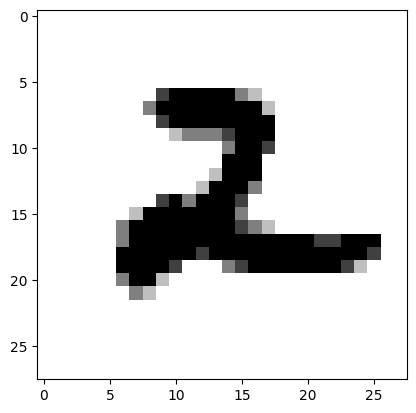

In [109]:
dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[29].numpy().squeeze(), cmap='gray_r');

In [110]:
print(imagens[0].shape) #para verificar as dimensões do tensor de cada imagem.
print(etiquetas[0].shape) #para verificar as dimensões do tensor de cada etiqueta.

torch.Size([1, 28, 28])
torch.Size([])


In [111]:
class Modelo(nn.Module):
  def __init__(self):
    super(Modelo, self).__init__()
    self.linear1 == nn.Linear(28*28, 128) # cada camada de entrada, 784 neurônios que se ligam a 128 neurônios.
    self.linear2 == nn.Linear(128, 64) # camada interna 1, 128 neurônios que se ligam a 64 neurônios.
    self.linear3 == nn.Linear(64, 10) # camada interna 2, 64 neurônios que se ligam a 10 .
    # Para cada camada de saída não é necessário definir nada , pois só precisamos pegar o output da camada interna 2.

  def forward(self, X):
    X = F. relu(self.linear1(X)) # função de ativação da camada de entrada para cada camada interna 1.
    X = F. relu(self.linear2(X)) # função de ativação da camada de entrada 1 para cada camada interna 2.
    X = self.linear3(x) #função de ativação da camda de entrada 2 para a camada de saída, neste caso f(x) = x
    return F.log_softmax(X, din=1) # dados utilizados para calcular a perda.

Modelo para treinar.

In [112]:
def treino(modelo, trainloader, device):

  otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5) # define a política de atualização dos pesos e da bias.
  inicio : float
  inicio = time() # timer para sabermos quanto tempo levou o treino.

  criterio = nn.NLLLoss() # definindo critérios para calcular as perdas.
  EPOCHS = 10 # numéros de epochs que o algoritmos rodará.
  modelo.train() # ativando o modo de treinamento do modelo.

  for epoch in range(EPOCHS):
    perda_acumulada = 0 # inicialização da perda acumulada da epoch em questão.

    for imagens, etiquetas in trainloader:
      imagens = imagens.view(imagens.shape[0], -1) # convertendo as imagens para vetores de 28*28 casas para ficarem compativeis com a
      otimizador.zero_grad() # zerando os gradientes por conta do ciclo anterior.

      output = modelo(imagens.to(device)) # colocando dados no modelo.
      perda_instantanea = criterio(output, etiquetas.to(device)) #  calculando a perda da epoch em questão.

      perda_instantanea.backward()  # back propagation a partir da perda.

      otimizador.step() # atualizandos os pesos e as bias.

      perda_acumulada += perda_instantanea.item() # atualização da perda acumulada.


    else:
        print("Epoch {} - Perda resultante: {}".format(epoch+1, perda_acumulada/len(trainloader)))
        print("\nTempo de treino (em minutos) =",(time()-inicio)/60)


Rodar a validação. Algoritmo vai verificar a base de dados do treino com o que esta acontecendo com o treinamento.

In [113]:
def validacao(modelo, valloader, device):
  conta_corretas, conta_todas = 0, 0
  for imagens, estiquetas in valloader:
    for i in range(len(etiquetas)):
      img = imagens[i].view(1, 784) # Desativar o autograd para acelerar a validação. Grafos computacionais dinâmicos tem um custo alto de processamento.
      with torch.no_grad():
        logps = modelo(img.to(device)) # output do modelo em escala logarítmica.

      ps = torch.exp(logps) # Converte output para escala normal(lembrando que é um tensor).
      probab = list(ps.cpu().numpy()[0])
      etiqueta_pred = probab.index(max(probab)) # converte um tensor em um número, no caso, o número que o modelo previu como correto.
      etiqueta_certa = etiquetas.numpy()[i]
      if(etiqueta_certa == etiqueta_pred): # compara a previsão com o valor correto.
        conta_corretas += 1
      conta_todas += 1

  print("Total de imagens testadas =", conta_todas)
  print("\nPrecisão do modelo = {}%".format(conta_corretas*100/conta_todas))


In [114]:
#modelo = Modelo()
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#modelo.to(device)
